# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [7]:
#Seu código de importação aqui
df = pd.read_csv("Dados_processados.csv")
df.head(10)

,Unnamed: 0,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_de_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,0,female,0,yes,no,1,0.0,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,no
1,1,male,0,no,no,34,0.1,dsl,yes,no,no,one year,mailed check,56.95,1889.50,no
2,2,male,0,no,no,2,0.1,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,yes
3,300,male,0,no,no,23,0.1,dsl,no,no,yes,one year,bank transfer (automatic),64.90,1509.80,no
4,301,female,1,no,no,4,0.1,fiber optic,no,no,yes,month-to-month,electronic check,95.45,396.10,yes
5,302,male,0,no,no,4,0.1,fiber optic,no,yes,no,month-to-month,electronic check,90.40,356.65,no
6,303,female,0,yes,yes,68,0.1,dsl,no,yes,yes,two year,credit card (automatic),60.30,4109.00,no
7,304,male,0,no,yes,38,0.1,fiber optic,no,no,no,month-to-month,mailed check,81.85,3141.70,no
8,305,male,0,yes,yes,52,0.1,no,no internet service,no internet service,no internet service,two year,mailed check,24.80,1229.10,no
9,306,male,1,yes,no,32,0.1,fiber optic,no,no,no,month-to-month,electronic check,74.90,2303.35,yes


In [203]:
df.dtypes

Unnamed: 0               int64
Genero                  object
Idoso                    int64
Casado                  object
Dependents              object
Tempo_como_Cliente       int64
PhoneService           float64
Servico_Internet        object
Servico_Seguranca       object
Suporte_Tecnico         object
StreamingTV             object
Tipo_Contrato           object
Metodo_de_Pagamento     object
Pagamento_Mensal       float64
Total_Pago             float64
Churn                   object
dtype: object

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [206]:
#Seu código aqui
df.describe()


,Unnamed: 0,Idoso,Tempo_como_Cliente,PhoneService,Pagamento_Mensal,Total_Pago
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,1407.318161,0.160920,32.441379,0.096690,65.607563,2298.104115
std,635.139224,0.367541,24.609875,0.017895,29.931520,2268.309079
min,0.000000,0.000000,0.000000,0.000000,18.400000,18.800000
25%,868.500000,0.000000,8.500000,0.100000,39.500000,404.825000
50%,1412.000000,0.000000,29.000000,0.100000,71.450000,1410.250000
75%,1955.500000,0.000000,56.000000,0.100000,90.250000,3894.875000
max,2499.000000,1.000000,72.000000,0.100000,118.650000,8564.750000


In [208]:
df.rename(columns={'Unnamed: 0': 'desconhecido'}, inplace=True)

In [210]:
df.describe()

,desconhecido,Idoso,Tempo_como_Cliente,PhoneService,Pagamento_Mensal,Total_Pago
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,1407.318161,0.160920,32.441379,0.096690,65.607563,2298.104115
std,635.139224,0.367541,24.609875,0.017895,29.931520,2268.309079
min,0.000000,0.000000,0.000000,0.000000,18.400000,18.800000
25%,868.500000,0.000000,8.500000,0.100000,39.500000,404.825000
50%,1412.000000,0.000000,29.000000,0.100000,71.450000,1410.250000
75%,1955.500000,0.000000,56.000000,0.100000,90.250000,3894.875000
max,2499.000000,1.000000,72.000000,0.100000,118.650000,8564.750000


In [212]:
(df['Tempo_como_Cliente'] == 0).sum()

5

In [214]:
(df['Tempo_como_Cliente'] == 0).mean() * 100


0.22988505747126436

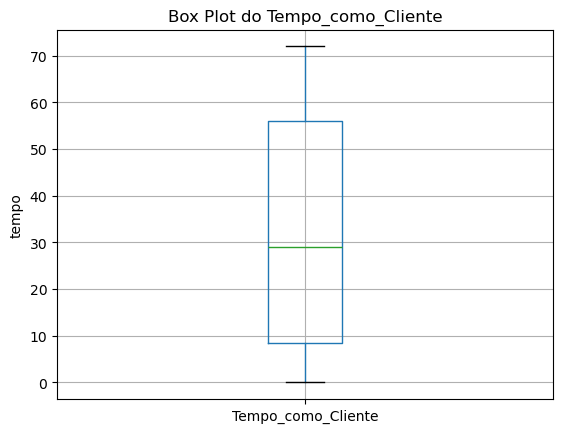

In [216]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot do Tempo_como_Cliente')
plt.ylabel('tempo')
plt.show()

In [218]:
(df['desconhecido'] == 0).sum()

1

In [220]:
(df['desconhecido'] == 0).mean() * 100

0.04597701149425287

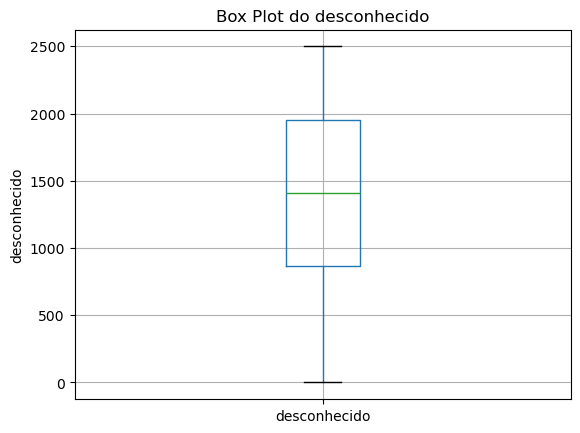

In [222]:
df.boxplot(column='desconhecido')
plt.title('Box Plot do desconhecido')
plt.ylabel('desconhecido')
plt.show()

In [224]:
(df['Pagamento_Mensal'] == 0).sum()

0

In [226]:
(df['Pagamento_Mensal'] == 0).mean() * 100

0.0

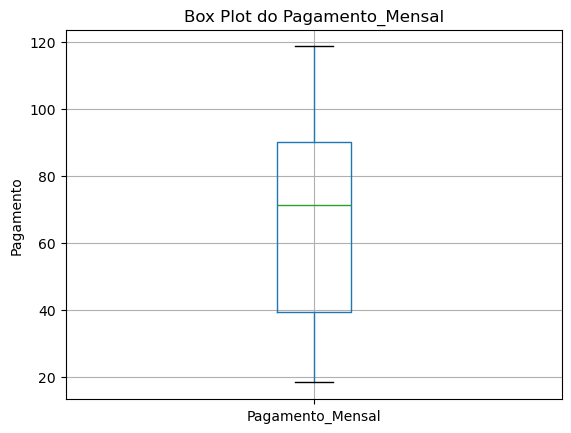

In [228]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot do Pagamento_Mensal')
plt.ylabel('Pagamento')
plt.show()

# Eu francamente não encontrei nenhum outlier

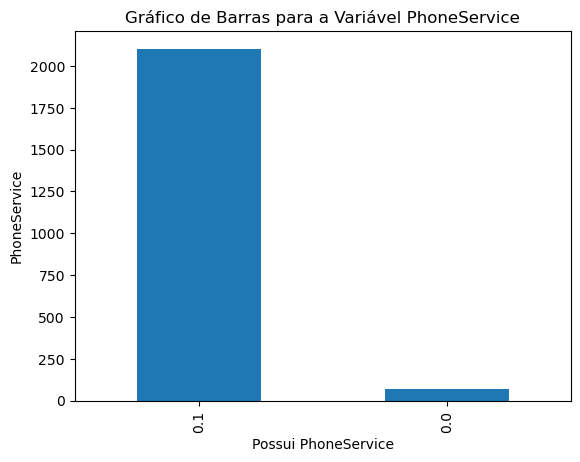

In [243]:
contagem_PhoneService = df['PhoneService'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_PhoneService = (contagem_PhoneService / contagem_PhoneService.sum()) * 100
ax = contagem_cartao.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável PhoneService')
plt.xlabel('Possui PhoneService')
plt.ylabel('PhoneService')

plt.show()

C:\Users\vinicius\AppData\Local\Temp\ipykernel_13260\3466115554.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



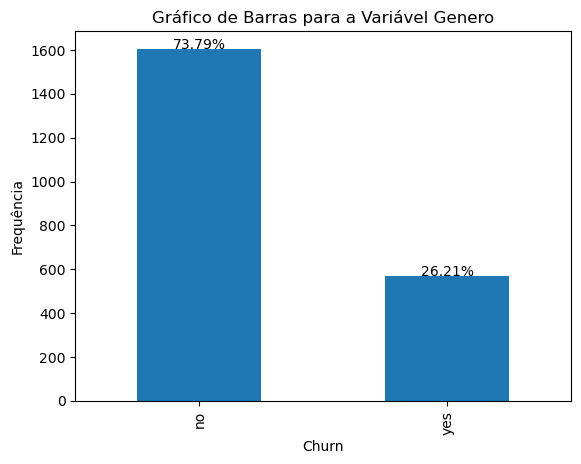

In [245]:
contagem = df['Churn'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Churn')
plt.ylabel('Frequência')

plt.show()

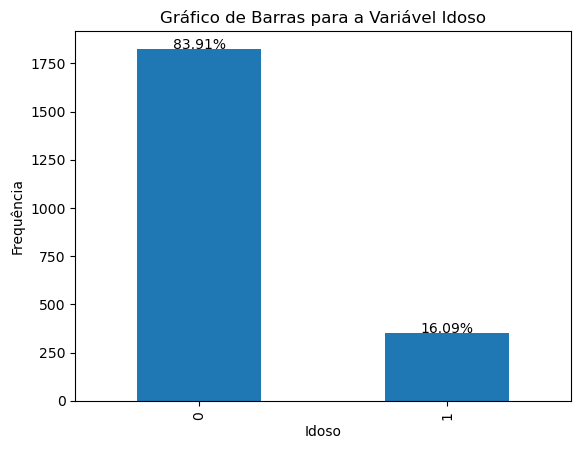

In [247]:
contagem = df['Idoso'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso')
plt.ylabel('Frequência')

plt.show()

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


# EU NÃO ENCONTREI NENHUMA VÁRIAVEL, COMO FOI PEDIDO PARA UTLIZAR O ARQUIVO DO EXERCICIO PRÁTICO PASSADO EU JÁ HAVIA RETIRADO TODAS OUTLIERS

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [254]:
df.head()

,desconhecido,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_de_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,0,female,0,yes,no,1,0.0,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,no
1,1,male,0,no,no,34,0.1,dsl,yes,no,no,one year,mailed check,56.95,1889.50,no
2,2,male,0,no,no,2,0.1,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,yes
3,300,male,0,no,no,23,0.1,dsl,no,no,yes,one year,bank transfer (automatic),64.90,1509.80,no
4,301,female,1,no,no,4,0.1,fiber optic,no,no,yes,month-to-month,electronic check,95.45,396.10,yes


C:\Users\vinicius\AppData\Local\Temp\ipykernel_13260\2645383836.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



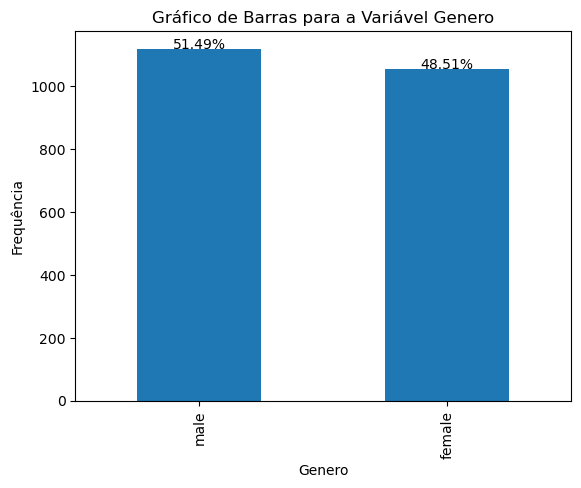

In [252]:
#Seu código aqui
contagem = df['Genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()


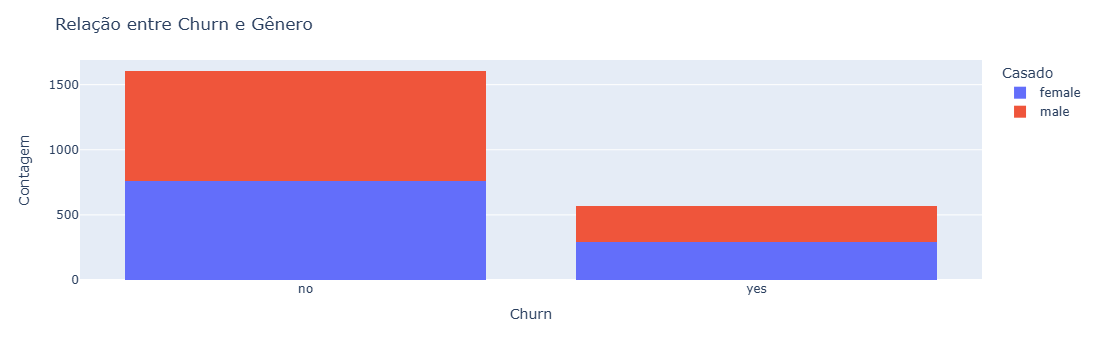

In [260]:
ffig = px.histogram(df, x='Churn', color='Casado', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Casado')
fig.show()

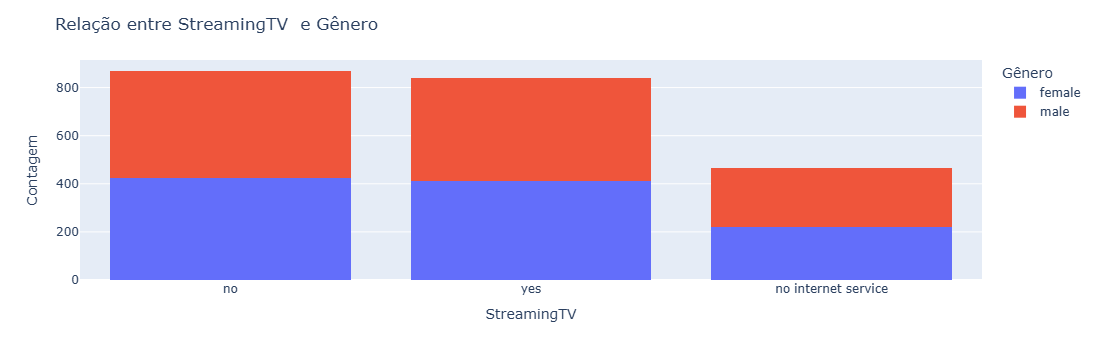

In [264]:
fig = px.histogram(df, x='StreamingTV', color='Genero', barmode='stack')

# Layout
fig.update_layout(title='Relação entre StreamingTV  e Gênero',
                  xaxis_title='StreamingTV',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

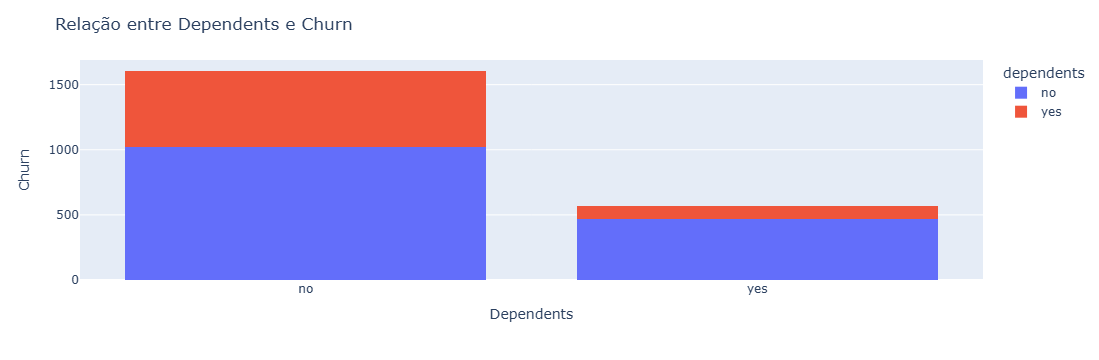

In [268]:
fig = px.histogram(df, x='Churn', color='Dependents', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Dependents e Churn',
                  xaxis_title='Dependents',
                  yaxis_title='Churn',
                  legend_title='dependents')
fig.show()

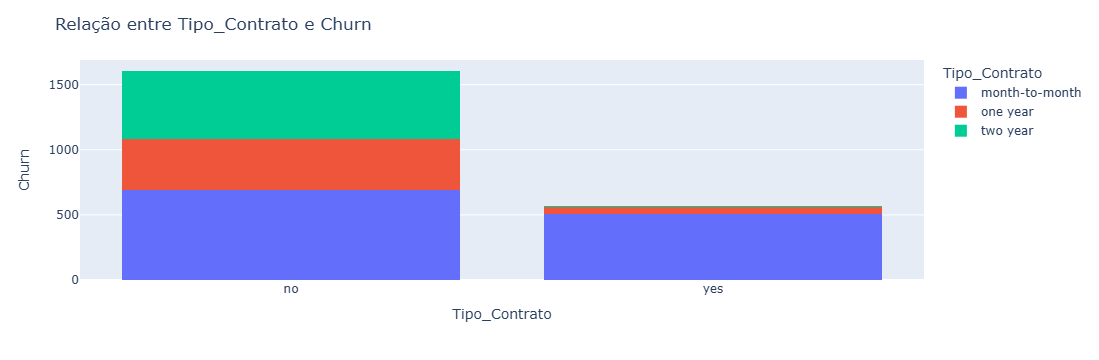

In [274]:
fig = px.histogram(df, x='Churn', color='Tipo_Contrato', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Tipo_Contrato e Churn',
                  xaxis_title='Tipo_Contrato',
                  yaxis_title='Churn',
                  legend_title='Tipo_Contrato')
fig.show()

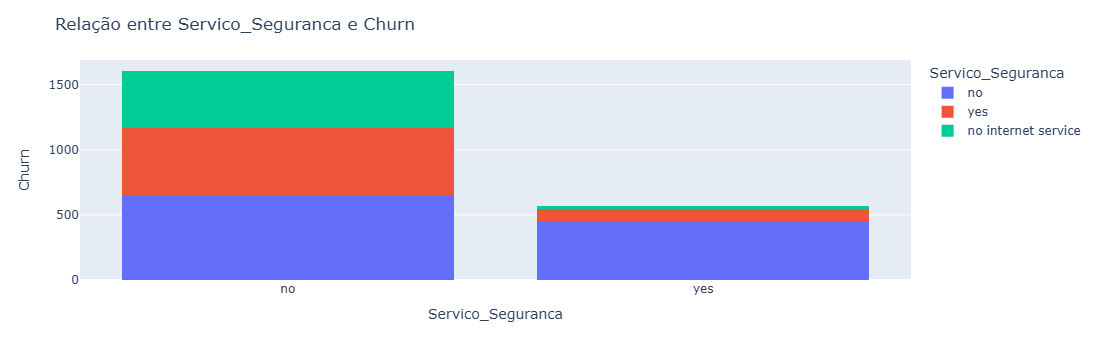

In [276]:
fig = px.histogram(df, x='Churn', color='Servico_Seguranca', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Servico_Seguranca e Churn',
                  xaxis_title='Servico_Seguranca',
                  yaxis_title='Churn',
                  legend_title='Servico_Seguranca')
fig.show()

# As váriaveis que mais achei importante foram Tipo_Contrato e Churn, Dependents e Churn, Serviço_Segurança e Churn, Gênero e Churn, pois conseguimos observar um número maior de quais serviços, assinaturas e gêneros deixam ou fazem deixar mais a empresa